In [3]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [72]:
from quantum_tools.examples import symbolic_contexts
from quantum_tools.symmetries.workspace import get_contraction_elements
from quantum_tools.config import *
from quantum_tools.visualization.sparse_vis import plot_matrix
from scipy import sparse
import numpy as np
from scipy import io
import os
from functools import reduce
from operator import mul
from quantum_tools.hypergraph.hypergraph_transversals import find_transversals, hyper_graph, HTStrat

In [28]:
def bulk_file(name):
    return os.path.join(BULK_DIR, name)

def save_sparse(name, M):
    io.mmwrite(bulk_file(name), M)

In [6]:
def sparse_density(A):
    try:
        max_size = reduce(mul, A.shape, 1)
        density = A.nnz / max_size
        return density
    except Exception as e:
        print(str(e))
        raise Exception("Likely not a sparse matrix. A.__class__: {0}".format(A.__class__))

In [7]:
symbolic_contexts.ABC_444_444.preinjectable_sets
# symbolic_contexts.ABC_444_444.outcomes

[[['A1', 'B1', 'C1'], ['A4', 'B4', 'C4']],
 [['A1', 'B2', 'C3'], ['A4', 'B3', 'C2']],
 [['A2', 'B3', 'C1'], ['A3', 'B2', 'C4']],
 [['A2', 'B4', 'C3'], ['A3', 'B1', 'C2']],
 [['A1'], ['B3'], ['C4']],
 [['A1'], ['B4'], ['C2']],
 [['A2'], ['B1'], ['C4']],
 [['A2'], ['B2'], ['C2']],
 [['A3'], ['B3'], ['C3']],
 [['A3'], ['B4'], ['C1']],
 [['A4'], ['B1'], ['C3']],
 [['A4'], ['B2'], ['C1']]]

In [19]:
small_row_sum, small_A, small_col_sum, small_contracted_A = get_contraction_elements(symbolic_contexts.ABC_222_222)

40 64
ShiftedBase(shift=0, base=(32, 16, 8, 4, 2, 1))
ShiftedBase(shift=0, base=(0, 4, 0, 2, 0, 1))
ShiftedBase(shift=8, base=(0, 4, 0, 2, 1, 0))
ShiftedBase(shift=16, base=(4, 0, 0, 2, 0, 1))
ShiftedBase(shift=24, base=(0, 4, 2, 0, 0, 1))
ShiftedBase(shift=32, base=(4, 0, 2, 0, 1, 0))
Found 14 row_orbits.
Found 20 col_orbits.


In [20]:
row_sum, A, col_sum, contracted_A = get_contraction_elements(symbolic_contexts.ABC_444_444)

16896 16777216
ShiftedBase(shift=0, base=(4194304, 1048576, 262144, 65536, 16384, 4096, 1024, 256, 64, 16, 4, 1))
ShiftedBase(shift=0, base=(1024, 0, 0, 256, 64, 0, 0, 16, 4, 0, 0, 1))
ShiftedBase(shift=4096, base=(1024, 0, 0, 256, 0, 64, 16, 0, 0, 4, 1, 0))
ShiftedBase(shift=8192, base=(0, 1024, 256, 0, 0, 64, 16, 0, 4, 0, 0, 1))
ShiftedBase(shift=12288, base=(0, 1024, 256, 0, 64, 0, 0, 16, 0, 4, 1, 0))
ShiftedBase(shift=16384, base=(16, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1))
ShiftedBase(shift=16448, base=(16, 0, 0, 0, 0, 0, 0, 4, 0, 1, 0, 0))
ShiftedBase(shift=16512, base=(0, 16, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1))
ShiftedBase(shift=16576, base=(0, 16, 0, 0, 0, 4, 0, 0, 0, 1, 0, 0))
ShiftedBase(shift=16640, base=(0, 0, 16, 0, 0, 0, 4, 0, 0, 0, 1, 0))
ShiftedBase(shift=16704, base=(0, 0, 16, 0, 0, 0, 0, 4, 1, 0, 0, 0))
ShiftedBase(shift=16768, base=(0, 0, 0, 16, 4, 0, 0, 0, 0, 0, 1, 0))
ShiftedBase(shift=16832, base=(0, 0, 0, 16, 0, 4, 0, 0, 1, 0, 0, 0))
Found 450 row_orbits.
Found 358120 col_o

In [68]:
save_sparse("ABC_444_444_row_sum.mtx", row_sum)

In [23]:
reset_selective A_csr

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [24]:
H_example = hyper_graph(small_contracted_A, 0)
H_example

<6x4 sparse matrix of type '<class 'numpy.int32'>'
	with 10 stored elements in Compressed Sparse Row format>

In [39]:
sparse_density(small_contracted_A)

0.2857142857142857

In [45]:
small_fts = find_transversals(small_contracted_A, strat=HTStrat('depth', max_t=2))

In [46]:
small_fts.raw().toarray().shape

(14, 2)

In [71]:
contracted_A_hg = hyper_graph(contracted_A, 0)
fts = find_transversals(contracted_A_hg, strat=HTStrat('depth', max_t=2))

<IPython.core.display.Javascript object>


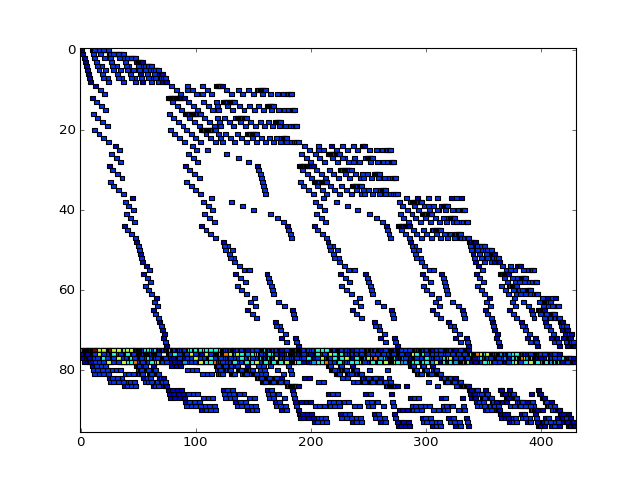

In [75]:
plot_matrix(contracted_A_hg)

In [73]:
fts.raw().toarray()

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1,

# Optimization Pipeline

1. Params
1. Measurement Operators, States
1. QuantumContext
1. Probability Distribution
1. Marginal Factorized Context Vector
1. Row Sum Contraction
1. Hypergraph Selection Contraction
1. Antecedent, Consequent Selection
1. Inequality Evaluation

0.0338335238105
0.0338335238083
0.0338335238105
0.0338335238105
0.0338335238105
0.0338335238163
0.0338335238105
0.0338335238105
0.0338335238105
0.0338335238127
0.0338335238105
0.0338335238105
0.0338335238105
0.0338335238084
0.0338335238105
0.0338335238105
0.0338335238105
0.0338335238116
0.0338335238105
0.0338335238105
0.0338335238105
0.0338335238093
0.0338335238105
0.0338335238105
0.0338335238105
0.0338335238098
0.0338335238105
0.0338335238105
0.0338335238105
0.0338335238154
0.0338335238105
0.0338335238105
0.0338335238105
0.0338335238066
0.0338335238105
0.0338335238105
0.0338335238105
0.0338335238025
0.0338335238105
0.0338335238105
0.0338335238105
0.0338335238113
0.0338335238105
0.0338335238105
0.0338335238105
0.0338335238081
0.0338335238105
0.0338335238105
0.0338335238105
0.0338335238159
0.0338335238105
0.0338335238105
0.0338335238105
0.0338335238163
0.0338335238105
0.0338335238105
0.0338335238105
0.0338335238208
0.0338335238105
0.0338335238105
0.0338335238105
0.0338335238057
0.033833

KeyboardInterrupt: 

In [63]:
# More info from hom
hom.string_logs

['Initialized',
 'BH Step result: 0.010716908486779456',
 'Local Minimum Accepted?: True',
 'New Best Objective Result: 0.010716908486779456',
 'Hit max iterations.',
 'Solved']

In [ ]:
small_fts.raw().toarray().shape